In [138]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
tel_data=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
tel_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [139]:
  #dropping nulls if there any and viewing the data
  tel_data.dropna()
  tel_data.info()
  #the total charge column is object althought it should be float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [140]:
tel_data=tel_data.drop(columns="customerID")


In [141]:
#these rows contain empty total charges so i will drop them so i can cast the column to be float
print(tel_data["TotalCharges"][tel_data["TotalCharges"]==' '])
tel_data.drop([488,753,936,1082,1340,3331,3826,4380,5218,6670,6754], axis=0, inplace=True)


488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object


In [142]:
tel_data["TotalCharges"] = tel_data["TotalCharges"].astype(float)
tel_data.info()
#casting done

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


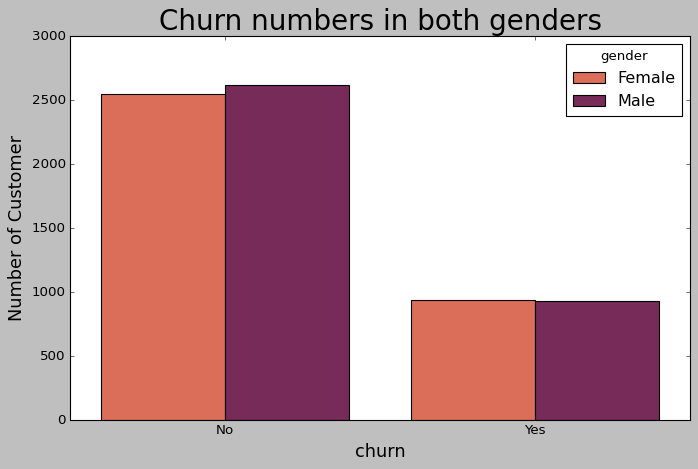

In [143]:
#visualizing the data to know relationships between them
plt.figure(figsize = (10,6))
plt.style.use('classic')
ax = sns.countplot(x = "Churn", hue = "gender", data = tel_data, palette= "rocket_r")
ax.set_title(label = "Churn numbers in both genders", fontsize = 25)
ax.set_xlabel(xlabel = "churn", fontsize = 16)
ax.set_ylabel(ylabel = "Number of Customer", fontsize = 16);
#churn is equal in both genders

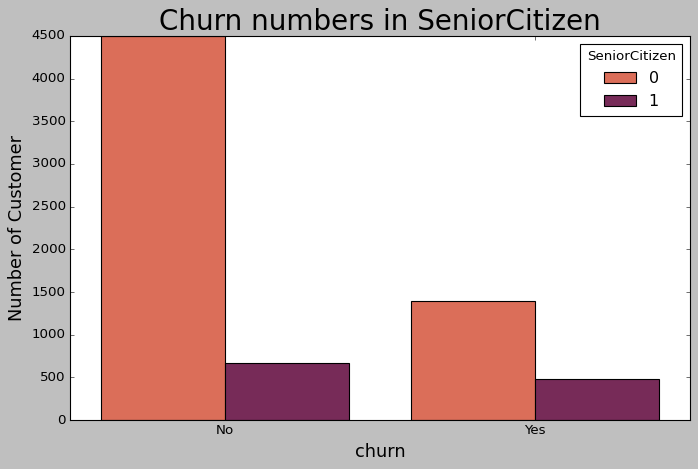

In [144]:
plt.figure(figsize = (10,6))
plt.style.use('classic')
ax = sns.countplot(x = "Churn", hue = "SeniorCitizen", data = tel_data, palette= "rocket_r")
ax.set_title(label = "Churn numbers in SeniorCitizen", fontsize = 25)
ax.set_xlabel(xlabel = "churn", fontsize = 16)
ax.set_ylabel(ylabel = "Number of Customer", fontsize = 16);
#churn is high in non senior citizens

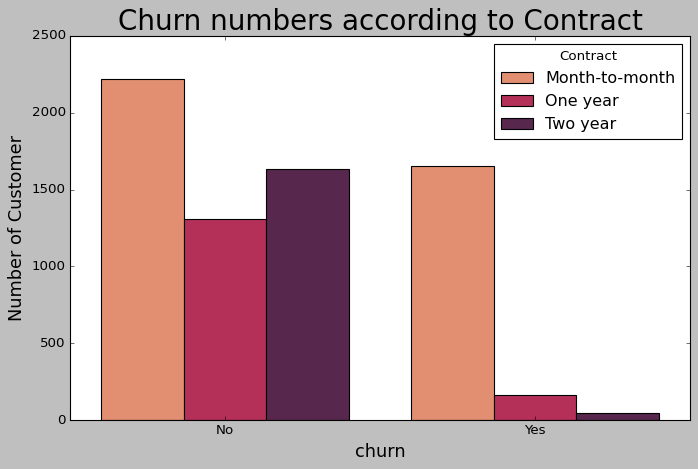

In [145]:
plt.figure(figsize = (10,6))
plt.style.use('classic')
ax = sns.countplot(x = "Churn", hue = "Contract", data = tel_data, palette= "rocket_r")
ax.set_title(label = "Churn numbers according to Contract", fontsize = 25)
ax.set_xlabel(xlabel = "churn", fontsize = 16)
ax.set_ylabel(ylabel = "Number of Customer", fontsize = 16);
#churn is high for people with month to month contract 

In [146]:
tel_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [147]:
#turning the object (string)columns into numeric(0,1) to be able to perform logistic regression
tel_data=pd.get_dummies(tel_data,drop_first=True)
tel_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


In [152]:
#putting all the data except for churn (the one to predict) into x and churn into y by 80-20(train,validation-test) percent 
from sklearn.model_selection import train_test_split
x=tel_data.drop("Churn_Yes",axis=1)
y=tel_data["Churn_Yes"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [157]:
from sklearn.linear_model import LogisticRegression

In [161]:
#training the model
churn_model=LogisticRegression().fit(x_train,y_train);

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [164]:
#predicting the churn for the data in x-test
churn_model_prediction = churn_model.predict(x_test)
churn_model_prediction

array([0, 0, 0, ..., 1, 0, 1], dtype=uint8)

In [168]:
#holding accuracy of the model prediction by comparing the model prediction with the actual results
import sklearn.metrics as sm
churn_model_accuracy_score=sm.accuracy_score(y_test, churn_model_prediction)*100
print("%",churn_model_accuracy_score)


% 80.52594171997157


In [169]:
#making confusion matrix of the model
from sklearn.metrics import confusion_matrix as cm
cm(y_test, churn_model_prediction)

array([[928, 110],
       [164, 205]])